<a href="https://colab.research.google.com/github/solaris0051/simpleNN/blob/main/in_1n_mid_12n_x4_out_1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **1. Product 概要**
---

1.1  名称  

---

*  simpleNN  
  
---

1.2  製作目論見  

---
*  ニューラルネットワークによる機械学習(初歩)の習得  
*  Pythonの習得
    *  Python選定理由
        *  行列演算モジュール(Numpyライブラリ)を利用することで行列演算が直感的かつ簡素に実装できるため
        *  数値計算結果などの可視化ライブラリ(Matplotlibライブラリ)が充実しているため  
        *  各レイヤにおいて、コードを再利用することで簡素に実装できるため(Object志向)    
          *  個人的な所感としては、上記3点により直感的かつ素直に実装できると理解   
*  ニューラルネットワークによる学習経過を閲覧者に楽しんでいただく  


# **2. Productに適用したニューラルネットワークの概要図**
---

*  全体のイメージ(フロー)を伝える  
  *  日経系雑誌のポンチ絵イメージで伝える(要素図面や矢印に番号を振り番号順にフローを伝える)。  
*  図面構成  
    *  全体フロー:  訓練(入力)(+正解) ⇔ NN ⇔ 学習後図面(+正解)  
---
*  レイヤの説明 ⇒ 各レイヤを枠で囲って伝える  
*  前方・後方伝搬 ⇒ 基本図形の矢印を使って伝える  
*  誤差判定箇所 ⇒ 出力レイヤに損失関数を
記載して伝える  
---
*  損失関数, 勾配降下法, bias broadcasting, weight, 活性化関数  ⇒ 定性的に目的を伝える + 数式で補間 
*  matrix計算 ⇒ matrixクラス(Numpyモジュールに含まれている)を使うことにより、プログラムの表現が、直感的かつ簡素になるイメージを伝える  
---
*  バッチ ⇒ 計算効率を向上させるため、計算を分割して実施すると簡単に伝える  
*  バッチサイズ ⇒ 本例は1バッチ ⇒ 1バッチの場合は自ずとオンライン学習(リアルタイム計算のイメージ)になることを伝える  
*  エポック数 ⇒ バッチ当たりの学習回数と伝える  
---


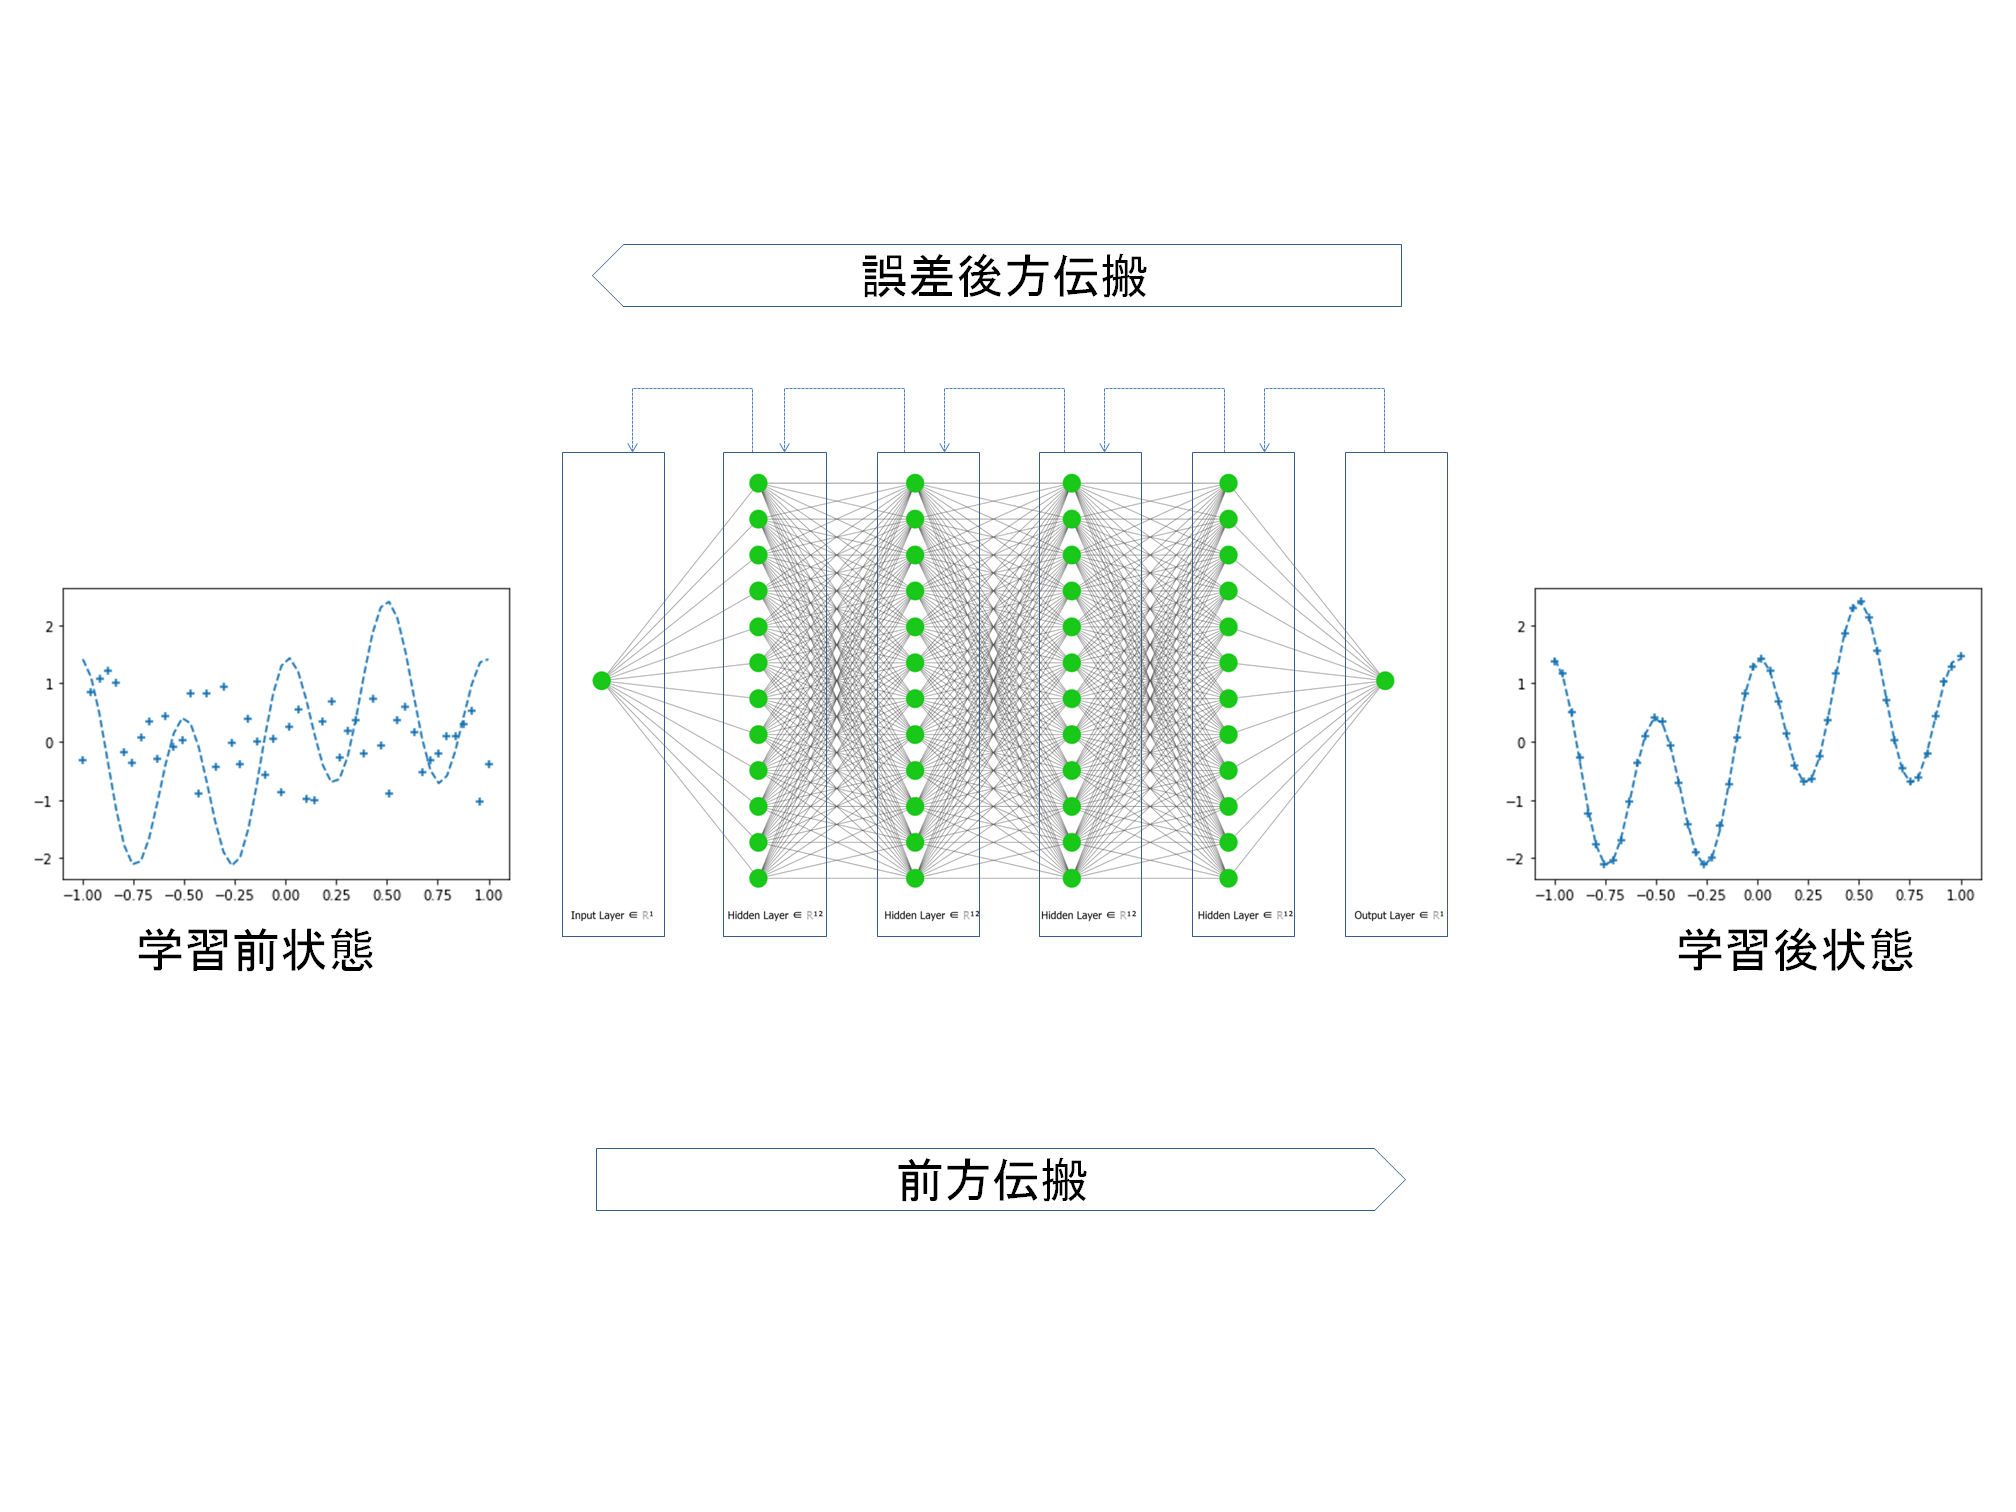


# **3. Product 内部概説**

---

3.1 数学的説明に関する前提    

---

*  数学表現に馴染みのある閲覧者を対象として、援用するにとどめる。  
    (基礎数学の解説は、代数学・解析学ともに割愛)  

---

3.2 対象とする問題  

---

*  回帰問題  

*  回帰問題とは
  *  二種類に大別される機械学習の一方    
    *  回帰問題 ⇒ データ傾向から連続的な数値を予測する。 (prediction)  (e.g. 雇用指数, 株価, ...)
    *  分類問題 ⇒ 特徴を抽出し分類する。  (clustering)  (e.g. 男性, 女性, ...)

---

3.3 学習アルゴリズム  

---

*  ニューラルネットワーク(NN)による教師付学習(SVM)  
  1.  前方伝搬(入力レイヤから出力レイヤへ向かって訓練データを伝搬)  
  2.  誤差修正(出力レイヤで誤差を計測)  
      2-1.  誤差の算出 ⇒ 出力レイヤに、損失関数として二乗和誤差(SSE)を適用して算出  
      2-2.  勾配降下法 ⇒ 損失関数の勾配(接線の傾き)を減らす方向へ重みを調整し、損失関数を最小化させる手法  
      (勾配の求め方 ⇒ 損失関数を1階(偏)微分で算出)  
      2-3.  誤差逆伝搬 ⇒ 出力レイヤから入力レイヤへニューラルネットワークを遡って誤差を伝搬  
*  バッチサイズ ⇒ 1バッチ (オンラインバッチ)  
*  学習過程の特異さに関して  
  *  生物では発見されていない学習過程(生物は古典的制御工学のフィードバックループ方式)  

---

3.3 行列演算モジュールとレイヤ構成による系の構成  

---
*  本項は消滅させる ⇒ 2項の図面に織り込んだ方が、全体像が伝わりやすそう   
*  2項の図面は1figureでなくてもよい。複数(3figures or so)にして、図面間の関連性を維持することで、分かりやすく伝える  

---
**変更点覚書  (伝えるために役立つ部分は織り込む)**  
---
*  Epoch数 ⇒ 8,001
      *  表示インターバル ⇒ 400学習毎  
      (1学習: 前方伝搬 x 1回 + 誤差後方伝搬 x 1回 (ニューラルネットワークを一往復するイメージ))  
*  入力データ数 ⇒ 50個 ( x = -1～+1, tick = 0.04)

---
**YAY THE MATH (not in place yet, though.) !!!**  
---
---

*  single neuron  

---

$$ u = \sum_{k=1}^n(x_kw_k) + b $$

---

*   activation function (sigmoid function)  

---

$$y = \frac{1}{1+\exp(-x)}$$

---

*  math between layers  

---

$$  \begin{aligned} \\
\vec{u_j} & = \vec{x_j} W + \vec{b_j} \\
    & = (x_1, x_2, \cdots, x_m)
   \left(
    \begin{array}{cccc}
      w_{11} & w_{12} & \ldots & w_{1n} \\
      w_{21} & w_{22} & \ldots & w_{2n} \\
      \vdots & \vdots & \ddots & \vdots \\
      w_{m1} & w_{m2} & \ldots & w_{mn} \\
    \end{array}
  \right) 
 + (b_1, b_2, \cdots, b_n) \\
  & = (\sum\limits_{k=1}^m x_kw_{k1}+b_1, \sum\limits_{k=1}^m x_kw_{k2}+b_2, \ldots, \sum\limits_{k=1}^m x_kw_{kn}+b_n)
  \end{aligned}
  $$ 
<br>
<br>
<br>
<br>
$$ \begin{aligned}
  \vec{y_j} & = (y_1, y_2, \cdots, y_n) \\
  & = f(\vec{u_j}) \\
  & = f(\vec{x_j}W + \vec{b_j}) \\
  & = (f(\sum\limits_{k=1}^m x_kw_{k1}+b_1), f(\sum\limits_{k=1}^m x_kw_{k2}+b_2), \ldots, f(\sum\limits_{k=1}^m x_kw_{kn}+b_n)
\end{aligned} $$

---

*  SSE  (loss function)

---

出力値と正解値の差を二乗し、全ての出力層のニューロンで総和をとったもの    

$$ E = \frac{1}{2} \sum_{k}(y_k-t_k)^2 $$
$$ E: 誤差,  y_k: 出力層の各出力値,  t_k: 正解値 $$

---

*  grad_out  

---

||||
|:-:|:-:|:--|
| 層 | ニューロンの添字 | ニューロン数 |
| 入力層 | $i$ | $l$ |
| 中間層 | $j$ | $m$ |
| 出力層 | $k$ | $n$ |
||||

$$ \delta_{k} = y_k-t_k $$
<br>
$$ \frac{\partial E}{\partial w_{jk}} = y_j \delta_{k}  $$
<br>
$$ \frac{\partial E}{\partial b_k} = \delta_{k} $$
<br>
$$ \frac{\partial E}{\partial y_j} = \sum_{r=1}^n \delta_r w_{jr}$$

---

*  grad_middle  

---

$$ \delta_{j} = \frac{\partial y_j}{\partial u_j}(1-y_j)y_j $$
<br>
$$ \frac{\partial E}{\partial w_{ij}} = y_i\delta_{j} $$
<br>
$$ \frac{\partial E}{\partial b_j} = \delta_{j} $$
<br>
$$ \frac{\partial E}{\partial y_j} =  \sum_{q=1}^m \delta_q w_{iq} $$

# **3. Pythonによる実装**

**(A series of results will show up anytime you make it fire.  )**

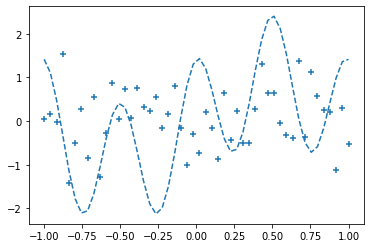

Epoch:0/8001 Accuracy:4.8760579987638275%


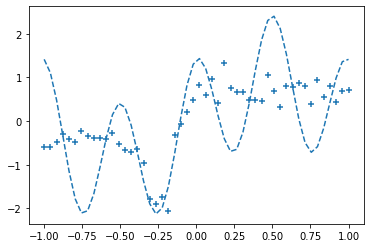

Epoch:400/8001 Accuracy:50.00599007273825%


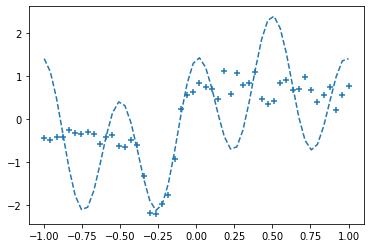

Epoch:800/8001 Accuracy:50.44681370424363%


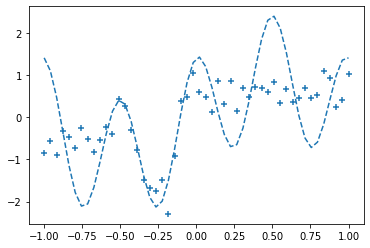

Epoch:1200/8001 Accuracy:54.95412101491435%


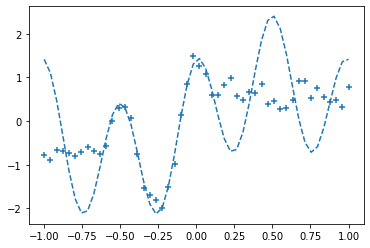

Epoch:1600/8001 Accuracy:54.203359389547145%


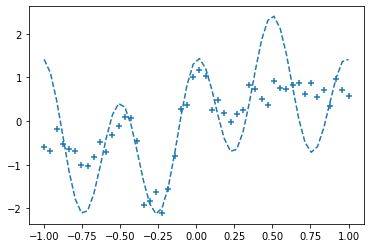

Epoch:2000/8001 Accuracy:65.56477274548502%


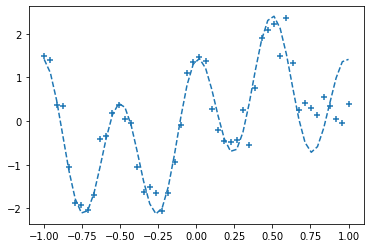

Epoch:2400/8001 Accuracy:88.17368819887292%


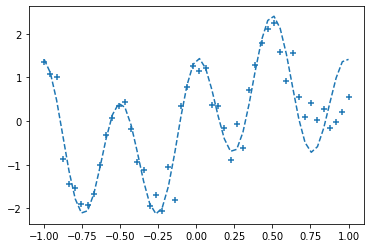

Epoch:2800/8001 Accuracy:89.27796593534055%


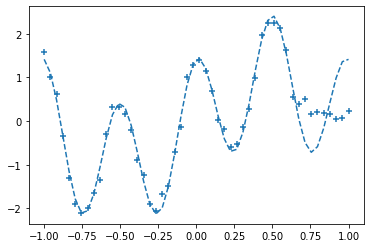

Epoch:3200/8001 Accuracy:92.6196803407205%


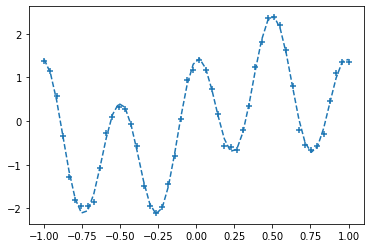

Epoch:3600/8001 Accuracy:99.6190963520113%


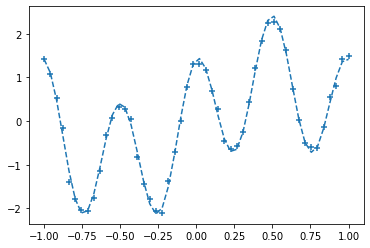

Epoch:4000/8001 Accuracy:99.60122513560931%


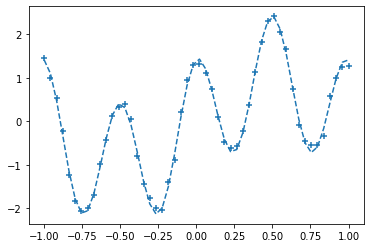

Epoch:4400/8001 Accuracy:99.60408034266722%


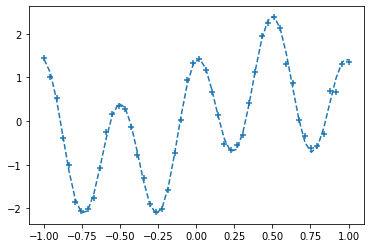

Epoch:4800/8001 Accuracy:99.54622679548318%


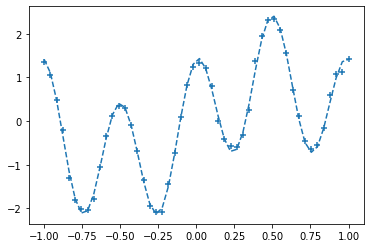

Epoch:5200/8001 Accuracy:99.65191473015891%


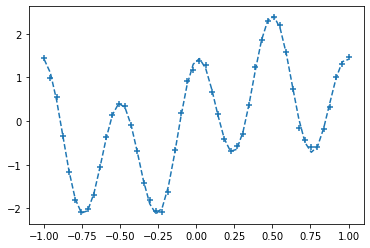

Epoch:5600/8001 Accuracy:99.77544511339946%


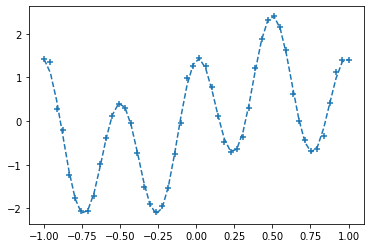

Epoch:6000/8001 Accuracy:99.64726228439493%


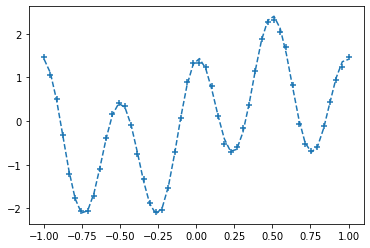

Epoch:6400/8001 Accuracy:99.84365734898428%


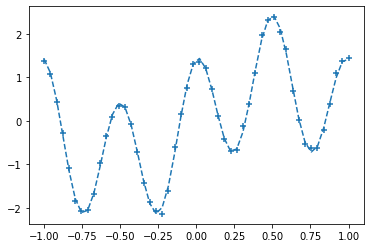

Epoch:6800/8001 Accuracy:99.78888156862902%


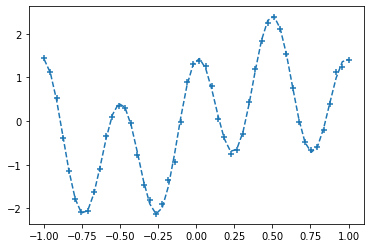

Epoch:7200/8001 Accuracy:99.80143447174457%


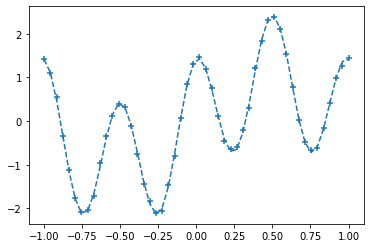

Epoch:7600/8001 Accuracy:99.91757180353133%


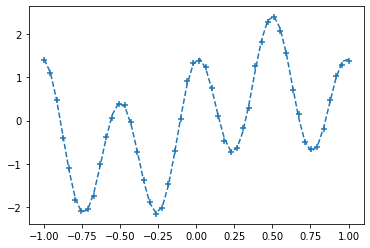

Epoch:8000/8001 Accuracy:99.88228419336819%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -- generate original input data and define correct data --
input_data = np.linspace(-np.pi, np.pi)  # original input dataset
correct_data = np.sin(input_data) + np.sqrt(2) * np.cos(4 * input_data) # correct dataset
input_data = input_data/np.pi            # normalize the data realm from -1.0 to 1.0
n_data = len(correct_data)               # total numbers(lengths) of data

# -- config --
n_in = 1   # the number of neurons at the input layer
n_mid = 12 # the number of neurons at the hidden layers
n_out = 1  # the number of neurons at the output layer

wb_width = 0.59912 # initial width of weight and bias
eta = 0.11257      # initial learning coefficient
epoch = 8001       # online batch, meaning its size is one.
interval = 400     # initial monitoring interval

# -- super-class --
class BaseLayer:
    def __init__(self, n_upper, n): #initializer (n_upper: the numbers of neurons in the upper(next) layer, n: the numbers of neurons in its own layer)
        self.w = wb_width * np.random.randn(n_upper, n)  # weight matrix (normalized)
        self.b = wb_width * np.random.randn(n)  # bias vector (normalized)

    def update(self, eta): # method for updating weight and bias
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

# -- sub-class #1--
# -- hiddenlayer--
class HiddenLayer(BaseLayer):
    def forward(self, x):  # method for foreward-propagation
        self.x = x
        u = np.dot(x, self.w) + self.b # u = [X][W] +[B]
        self.y = 1/(1+np.exp(-u))  # use sigmoid function for activaion

    def backward(self, grad_y):  # method for backward-propagation
        delta = grad_y * (1-self.y)*self.y  # delta = gradient of sigmoid function
        self.grad_w = np.dot(self.x.T, delta) # take gradient of weight backward
        self.grad_b = np.sum(delta, axis=0) # take sum of bias-broadcasting backward
        self.grad_x = np.dot(delta, self.w.T) # take gradient of data input in this layer

# -- sub-class #2--
# -- output layer --
class OutputLayer(BaseLayer):
    def forward(self, x):  # method for foreward-propagation
        self.x = x 
        u = np.dot(x, self.w) + self.b  # [u] = [X][W] + [B]
        self.y = u   # use identity function for activation [Y] = [u] = [X][W] + [B]  

    def backward(self, t):  # method for backward-propagation
        delta = self.y - t # [delta] = [Y] - [T] (raw loss)
        self.grad_w = np.dot(self.x.T, delta) # take gradient of weight backward; [grad_W] = [X]T[DELTA]
        self.grad_b = np.sum(delta, axis=0) # take sum of bias-broadcasting backward; grad_b = sum(DELTA)
        self.grad_x = np.dot(delta, self.w.T) # take gradient of data input in this layer; [grad_B] = [DELTA][W]T


# -- initializing each layer --
hidden_layer1 = HiddenLayer(n_in, n_mid)
hidden_layer2 = HiddenLayer(n_mid, n_mid)
hidden_layer3 = HiddenLayer(n_mid, n_mid)
hidden_layer4 = HiddenLayer(n_mid, n_mid)

output_layer = OutputLayer(n_mid, n_out)

# -- start learning --
for i in range(epoch):

    # shffle the indecies of arrays of input and their corresponding correct data to make learning order randamized
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)

    # preparation for plotting the results
    total_error = 0
    plot_x = []
    plot_y = []

    for idx in index_random:

        x = input_data[idx]  # original input dataset
        t = correct_data[idx]  # correct dataset

        # foreward-propagation
        hidden_layer1.forward(np.array([[x]]))  # treat input dataset as a matrix(that consists of just one number, though.)
        hidden_layer2.forward(hidden_layer1.y)
        hidden_layer3.forward(hidden_layer2.y)
        hidden_layer4.forward(hidden_layer3.y)
        output_layer.forward(hidden_layer4.y)

        # backward-propagation
        output_layer.backward(np.array([[t]]))  # treat correct dataset as a matrix(that consists of just one number, though.)
        hidden_layer4.backward(output_layer.grad_x)
        hidden_layer3.backward(hidden_layer4.grad_x)
        hidden_layer2.backward(hidden_layer3.grad_x)
        hidden_layer1.backward(hidden_layer2.grad_x)

        # update weight and bias (method of update defined in the class BaseLayer)
        hidden_layer1.update(eta)
        hidden_layer2.update(eta)
        hidden_layer3.update(eta)
        hidden_layer4.update(eta)
        output_layer.update(eta)

        if i%interval == 0:

            y = output_layer.y[0][0]  # get a number (from matrix) as a learned one in the output layer.

            # error estimation by loss function (apply mean square error)
            total_error += 1.0/2.0*np.sum(np.square(y - t))

            # store outputs learned
            plot_x.append(x)
            plot_y.append(y)

    if i%interval == 0:

        # plot outpus
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()

        # print epoch number and accuracy
        print("Epoch:" + str(i) + "/" + str(epoch), "Accuracy:" + str(((1 - total_error/n_data)) * 100) + "%")